# Milestone 1 - SECOM Manufacturing
Version: July-2020 Capstone Project
## Author - Priya Asokan

## Instructions
1. Refine your data understanding and prepare a DFD of solving the manufacturing quality problem
2. Read and merge data
3. Clean and prepare data 
4. Visually explore data
5. Handle class imbalance problem
6. Apply feature selection techniques to reduce dimensionality of data
7. What are your initial findings? Describe them in a summary section

## Abstract
Dataset used here is SECOM Manufacturing.This contains two different datasets, first set consists of different sensor readings  and the second dataset consists of classification of the data on different timestamps.

I have prepared and cleaned the data and used some plots to analyze the data.This dataset is highly imbalanced.I am building a logistic Regression model to predict fault detection in manufacturing process.To handle imbalanced dataset , I am using SMOTE (Synthetic Minority Oversampling Technique). As this dataset set has large number of features, I am using feature selection techniques like Filter,wrapper & embedded methods to reduce dimensionality of the data and build a robust model. I have also applied hyper parameter tuning from the best feauters selected to make more accurate predictions.



## Problem
This dataset predicts pass/fail tests from SECOM manufacturing process by building classification models and evaluating the models with the best scores.



## Summary
### 1. Data Cleanup & Preparation
- Merged the two data sets
- Removed 20 columns that have more than 1000 nan values.
- Replaced other columns Nan values with median values
### 2. Data Visuallization
- Classification with pass category has 1463 values and fail category has 104 values.(Imbalanced dataset)
- Plotted bar plot, facet plot and pair plot to show the relationship between different features.
### 3. Building a Logistic Regression Model using SMOTE Technique to handle class imbalance problem
- Data is split into three parts (Train, Tune and Test).
- Accuracy value before SMOTE is 0.90 and after SMOTE is - 0.64. With logistic regression though accuracy is very high,   precision/recall& F1 score values are all 0.0.
- After applying SMOTE technique, the F1 score is 0.12.
- With imbalanced datset, F1 score will be a more appropriate metrics to meaure the model performance, The more the F1 values, the better it performs. In this case, data set has better F1 value of 0.12 when compared to 0.0. So, it will have better performance after applying SMOTE technique.
### 4. Feature Selection
- Applied three techniques for feature selection. Filter Method, Wrapper Method using (Recursive feature selection technique) and embedded method (Lasso, Ridge and Elastic Net).
- Filter Method selects 349 features from 570 with an accuracy value-0.95, AUC-0.61, Precision-0.67, Recall-0.17,F1-score-0.27.
- Wrapper method selects top 20 features with an accuracy value -0.93, AUC-0.55,Precision, Recall & f1score - 0.0.
- Here is the summary of all three embedded methods.
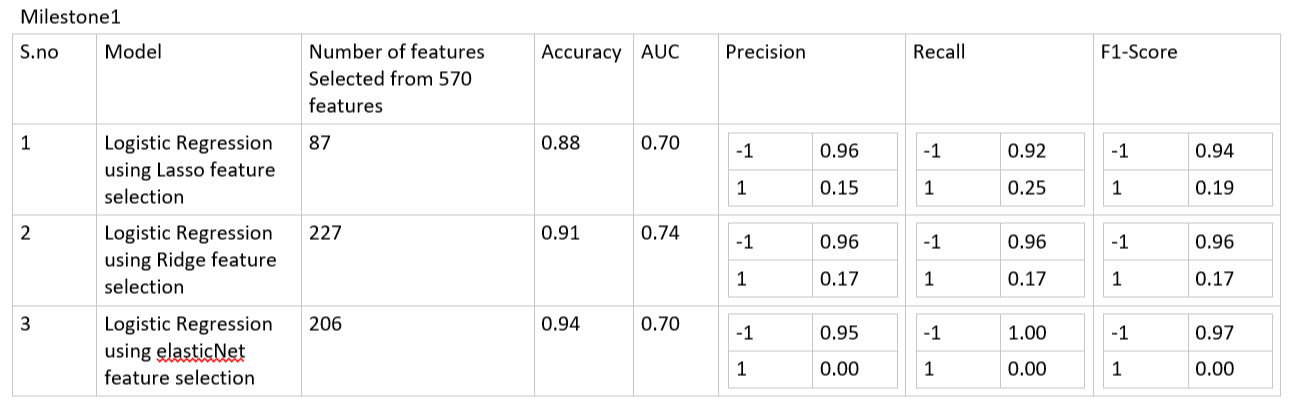
- From the above results, Lasso selects 87 features with a good precision , recall and F1 score value.
#### So the best model performance is acheived on tune set using Lasso regression model.
### 5. Hyper Parameter Tuning
- Applied GridSearchCV for hyperparameter tuning. The best model is selected and hyper paramters selected are -{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}.
- Applying the best model on test set gives a better accuracy and F1 score of 0.07 for failed tests results.

 

### 1. Data Understanding and Data Flow Diagram (Attached as a seperate file)

### 2. Read & Merge Data

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
# Set Random value
SEED= 2005

In [4]:
# Load Dataset
df_secom = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom.csv',sep=" ")
df_secom.shape

(1566, 590)

In [5]:
# Load the first dataset with column names
url = "https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom.csv"
names = ["feature" + str(x) for x in range(1,591)]
df_secom = pd.read_csv(url, sep=" ", names=names, na_values = "NaN") 


In [6]:
# Load the second dataset with column names
url_l = "https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom_labels.csv"
secom_labels = pd.read_csv(url_l,sep=" ",names = ["classification","date"],parse_dates = ["date"],na_values = "NaN")
secom_labels.head()

,classification,date
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


In [7]:
# Merge two datasets
secom_merged = pd.merge(df_secom,secom_labels,left_index = True,right_index = True)
secom_merged.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,...,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,feature372,feature373,feature374,feature375,feature376,feature377,feature378,feature379,feature380,feature381,feature382,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature395,feature396,feature397,feature398,feature399,feature400,feature401,feature402,feature403,feature404,feature405,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature415,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature423,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature450,feature451,feature452,feature453,feature454,feature455,feature456,feature457,feature458,feature459,feature460,feature461,feature462,feature463,feature464,feature465,

In [8]:
secom_merged.shape

(1567, 592)

### 3. Data Preparation


In [9]:
# Print the list of columns that have more than 1000 Nan values
featuresNullCount = secom_merged.isnull().sum()
colsWithMoreNans = []
for i in featuresNullCount.keys():
    if(featuresNullCount[i] >1000):
        print(i, featuresNullCount[i])
        colsWithMoreNans.append(i)

feature86 1341
feature110 1018
feature111 1018
feature112 1018
feature158 1429
feature159 1429
feature221 1341
feature245 1018
feature246 1018
feature247 1018
feature293 1429
feature294 1429
feature359 1341
feature383 1018
feature384 1018
feature385 1018
feature493 1341
feature517 1018
feature518 1018
feature519 1018


In [10]:
# Drop 20 columns that has a count of more than 1000 Nan values
secom_merged.drop(colsWithMoreNans, axis = 1, inplace = True)

In [11]:
secom_merged.shape

(1567, 572)

In [12]:
secom_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 572 entries, feature1 to date
dtypes: datetime64[ns](1), float64(570), int64(1)
memory usage: 6.8 MB


#### Missing Data Imputation

In [13]:
# Replace Nan values with median values of each column
for (col) in secom_merged:
    secom_merged.loc[:,col] = pd.to_numeric(secom_merged.loc[:,col],errors="coerce")
    HasNan = np.isnan(secom_merged.loc[:,col])
    secom_merged.loc[HasNan,col] = np.nanmedian(secom_merged.loc[:,col])

In [14]:
# Check for any null values
secom_merged.isnull().any().any()

False

In [15]:
# Drop the date column
secom_merged = secom_merged.drop(columns = ['date'], axis = 1)
secom_merged.shape

(1567, 571)

In [16]:
secom_merged.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,...,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,feature372,feature373,feature374,feature375,feature376,feature377,feature378,feature379,feature380,feature381,feature382,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature395,feature396,feature397,feature398,feature399,feature400,feature401,feature402,feature403,feature404,feature405,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature415,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature423,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature450,feature451,feature452,feature453,feature454,feature455,feature456,feature457,feature458,feature459,feature460

In [17]:
secom_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 571 entries, feature1 to classification
dtypes: float64(571)
memory usage: 6.8 MB


### 4. Data Exploration

In [18]:
#Count of values in each class
secom_merged['classification'].value_counts()

-1.0    1463
 1.0     104
Name: classification, dtype: int64

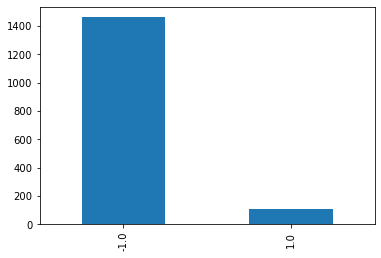

In [19]:
# Bar plot to show class imbalance
secom_merged['classification'].value_counts().plot(kind = 'bar')

Number of test Passes are greater than test failures

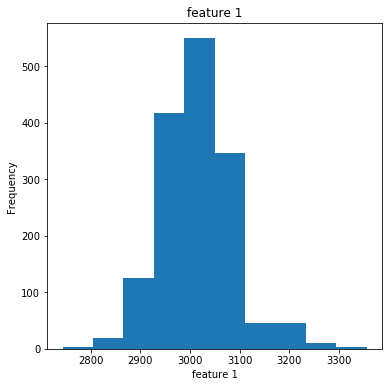

In [20]:
# Distribution of secom manifacturing features- feature1
plt.figure(figsize = (6,6))
secom_merged.loc[:,'feature1'].plot.hist()
plt.title('feature 1')# Give the plot a main title
plt.xlabel('feature 1') # Set text for x axis
plt.show()

[Text(0, 0.5, 'feature3'), Text(0.5, 0, 'classification')]

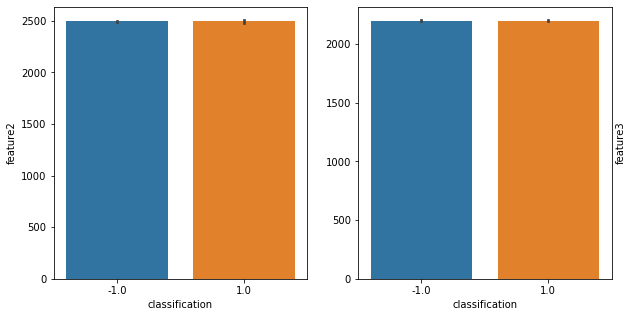

In [21]:
# Bar plot to show relationship between (feature2 & classification) and (feature3 & classification) 
f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(x=secom_merged['classification'],y=secom_merged['feature2'], ax=axes[0])
sns.barplot(x=secom_merged['classification'],y=secom_merged['feature3'], ax=axes[1])
axes[0].set(xlabel='classification', ylabel='feature2')
axes[1].yaxis.set_label_position("right")
axes[1].set(xlabel='classification', ylabel='feature3')

Classification category for feature 2 and feature3

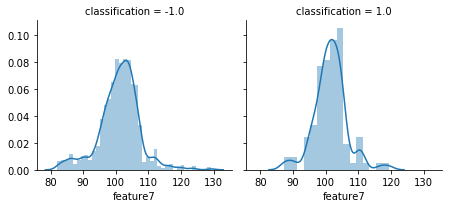

In [22]:
# Facet plot to show feature7 with classification of defected items or not
g = sns.FacetGrid(secom_merged, col="classification",col_wrap=6)
g.map(sns.distplot, "feature7")

Distribution of defected items  and non defected items for feature 7

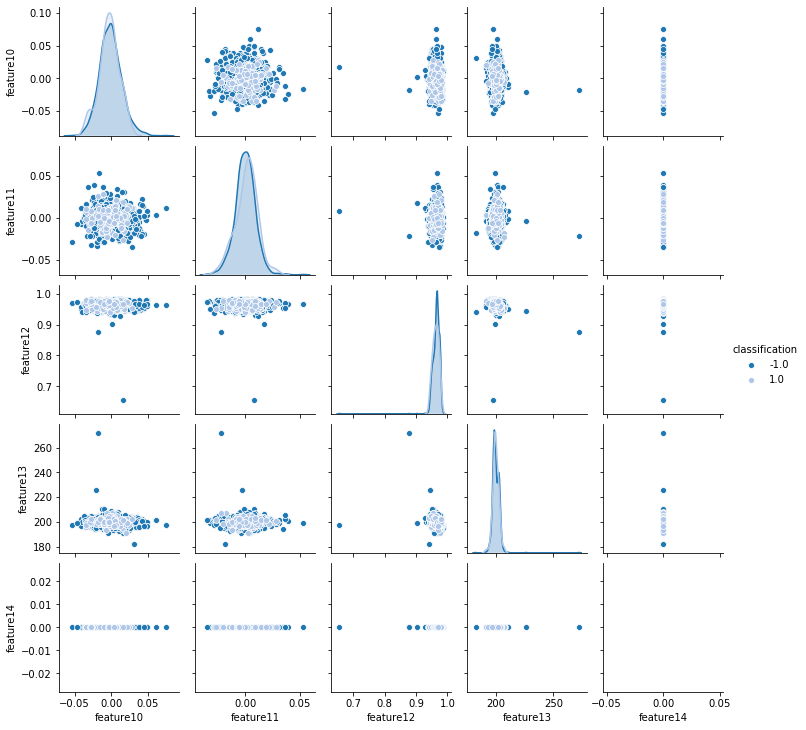

In [23]:
# Pairplot for different features and their classifications
num_cols = ['feature10','feature11','feature12','feature13','feature14','classification']
sns.pairplot(secom_merged.loc[:, num_cols], hue='classification', 
             palette="tab20", diag_kind="kde", 
             height=2)
plt.show()

Shows the distribution of plots between different pairs

### 5. Building a Classification Model

**split data into 3 parts: train (70%), tune (15%), and test (15%). The tune set is used to perform model selection and feature selection**

In [24]:
# Seperate train test set
secom_merged_train, secom_merged_tune_test = train_test_split(secom_merged,
                                    test_size = 0.3,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = secom_merged['classification'])

In [25]:
# further evenly split between tune and test
secom_merged_tune, secom_merged_test = train_test_split(secom_merged_tune_test,
                                    test_size=0.5,
                                    random_state=SEED,
                                    shuffle=True,
                                    stratify=None)

In [26]:
# double check data dimensions after the split
print(secom_merged.shape)
print(secom_merged_train.shape)
print(secom_merged_tune.shape)
print(secom_merged_test.shape)

(1567, 571)
(1096, 571)
(235, 571)
(236, 571)


### Feature Scaling

In [27]:
# scale numeric features
sc = StandardScaler()
sc.fit(secom_merged_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
secom_merged_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,...,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,feature372,feature373,feature374,feature375,feature376,feature377,feature378,feature379,feature380,feature381,feature382,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature395,feature396,feature397,feature398,feature399,feature400,feature401,feature402,feature403,feature404,feature405,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature415,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature423,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature450,feature451,feature452,feature453,feature454,feature455,feature456,feature457,feature458,feature459,feature460

In [29]:
# Set the target train, tune and test values
y_train = secom_merged_train["classification"].to_numpy()
y_tune = secom_merged_tune["classification"].to_numpy()
y_test = secom_merged_test["classification"].to_numpy()

In [30]:
# drop target to predict
secom_merged_train = secom_merged_train.drop(["classification"], axis=1)
secom_merged_tune = secom_merged_tune.drop(["classification"], axis=1)
secom_merged_test = secom_merged_test.drop(["classification"], axis=1)

In [31]:
# feature matrix
X_train = secom_merged_train.to_numpy()
X_tune = secom_merged_tune.to_numpy()
X_test = secom_merged_test.to_numpy()

In [32]:
secom_merged_train.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10',
       ...
       'feature581', 'feature582', 'feature583', 'feature584', 'feature585',
       'feature586', 'feature587', 'feature588', 'feature589', 'feature590'],
      dtype='object', length=570)

In [33]:
# feature names
feature_names = secom_merged_train.columns

In [34]:
# double check dimensions in training set
print(secom_merged_train.shape)
print(X_train.shape)
print(y_train.shape)

#Double check dimensionality in tune set
print(secom_merged_tune.shape)
print(X_tune.shape)
print(y_tune.shape)

# double check dimensions in test set
print(secom_merged_test.shape)
print(X_test.shape)
print(y_test.shape)

(1096, 570)
(1096, 570)
(1096,)
(235, 570)
(235, 570)
(235,)
(236, 570)
(236, 570)
(236,)


In [35]:
# Logistic Regression classifier
logisticModel = LogisticRegression(random_state=SEED)
logisticModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2005, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Performance metrics for classification model
def metrics(modelName,X_train,y_train,X_test,y_test): 
    y_test_pred = modelName.predict(X_test)
    print('Confusion Matrix')
    # print out confusion matrix
    cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    print(cm)
    
    # calculate accuracy on test set    
    accuracyScoreTest = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    print('Accuracy of Test Set : ' + str(accuracyScoreTest))
    
    # prediction accuracy on training set
    y_train_pred = modelName.predict(X_train)
    accuracyScoreTrain = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    print('Accuracy of Train Set : ' + str(accuracyScoreTrain))
    
    # Draw ROC curve
    y_test_prob = modelName.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
    roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)
    plt.plot(fpr, tpr, color="blue", label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
    plt.title("Receiver Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.show()
    
    # comprehensive classification report
    print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

**********************Logistic Regression***********************
Confusion Matrix
[[213   4]
 [ 19   0]]
Accuracy of Test Set : 0.902542372881356
Accuracy of Train Set : 0.9343065693430657


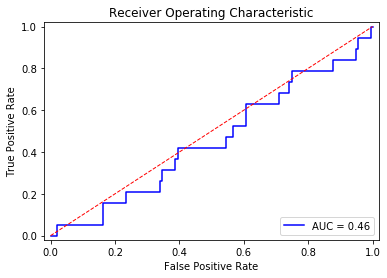

              precision    recall  f1-score   support

        -1.0       0.92      0.98      0.95       217
         1.0       0.00      0.00      0.00        19

    accuracy                           0.90       236
   macro avg       0.46      0.49      0.47       236
weighted avg       0.84      0.90      0.87       236



In [37]:
print("**********************Logistic Regression***********************")
# Performance metrics calculation 
metrics(logisticModel,X_train,y_train,X_test,y_test)

## Mitigate Class Imbalance by SMOTE

In [38]:
# instantiate SMOTE object
smt = SMOTE(random_state=SEED)
print(smt)

SMOTE(k_neighbors=5, n_jobs=None, random_state=2005, sampling_strategy='auto')


In [39]:
# fit SMOTE
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [40]:
# X data dimensions before and after SMOTE
print(X_train.shape)
print(X_train_res.shape)

(1096, 570)
(2046, 570)


In [41]:
# Y data dimensions before and after SMOTE
print(y_train.shape)
print(y_train_res.shape)

(1096,)
(2046,)


In [42]:
# SMOTE makes training data evenly distributed
print(pd.crosstab(y_train, "count"))
print(pd.crosstab(y_train_res, "count"))

col_0  count
row_0       
-1.0    1023
 1.0      73
col_0  count
row_0       
-1.0    1023
 1.0    1023


In [43]:
# logistic regression model object
logisticModel_res = LogisticRegression(random_state=SEED)

# fit model with SMOTE resampled data
logisticModel_res.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2005, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[146  71]
 [ 13   6]]
Accuracy of Test Set : 0.6440677966101694
Accuracy of Train Set : 0.7414467253176931


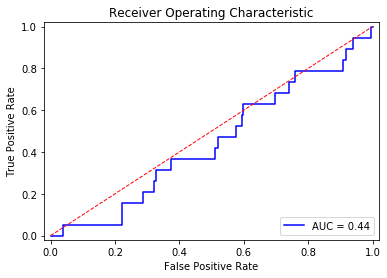

              precision    recall  f1-score   support

        -1.0       0.92      0.67      0.78       217
         1.0       0.08      0.32      0.12        19

    accuracy                           0.64       236
   macro avg       0.50      0.49      0.45       236
weighted avg       0.85      0.64      0.72       236



In [44]:
# Performance Metrics calculation after applying SMOTE technique
metrics(logisticModel_res,X_train_res,y_train_res,X_test,y_test)

### 6. Feature Selection

### Filter Method

In [45]:
# calculate mutual information
mi = mutual_info_classif(X=X_train, y=y_train, random_state=SEED)

In [46]:
# double check
print(len(mi))
print(sum(mi>0)) # how many have mutual information > 0
print(pd.Series(mi).describe())
print(mi)

570
349
count    570.000000
mean       0.004774
std        0.006148
min        0.000000
25%        0.000000
50%        0.001804
75%        0.008290
max        0.027943
dtype: float64
[4.37920522e-03 0.00000000e+00 2.23488868e-02 5.29204636e-03
 0.00000000e+00 0.00000000e+00 1.23995723e-02 8.28761556e-03
 1.57808973e-03 4.66217196e-03 0.00000000e+00 0.00000000e+00
 1.30838534e-03 4.45189064e-03 5.25458569e-03 1.47731283e-02
 7.13725848e-03 6.33411708e-03 0.00000000e+00 4.04031315e-04
 0.00000000e+00 4.29186199e-03 6.63120676e-04 0.00000000e+00
 0.00000000e+00 1.82910349e-03 4.88177144e-03 6.80357443e-03
 2.80115470e-03 1.10156065e-02 1.27222242e-03 0.00000000e+00
 6.42294315e-03 1.59309519e-02 0.00000000e+00 2.20911378e-02
 0.00000000e+00 2.60151253e-02 1.10210447e-02 1.96762851e-02
 9.88582895e-03 2.56576509e-02 3.53445880e-03 2.12773492e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.16633820e-02
 1.73873286e-03 2.29787708e-03 1.98886308e-03 4.84815043e-03
 0.00000000e+00 0.000000

In [47]:
# Filter rows that have mi>0
mi_filter = mi > 0
X_train_filter = X_train[:, mi_filter]# Set X_train col values
X_tune_filter = X_tune[:, mi_filter] #Set X_tune col values
X_test_filter = X_test[:, mi_filter] #Set X_test col values
feature_names_filter = feature_names[mi_filter]

In [48]:
# double check dimensions
print(X_train.shape)
print(X_train_filter.shape)
print(feature_names_filter.shape)

(1096, 570)
(1096, 349)
(349,)


In [49]:
# fit a LogisticRegression model on filtered features
estimator_filter =LogisticRegression(random_state=SEED)
estimator_filter.fit(X_train_filter, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2005, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Predict y_tune values and calculate teh accuracy score
y_tune_pred = estimator_filter.predict(X_tune_filter)
accuracyScoreTune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)# Get accuracy score
print('Accuracy of Tune Set : ' + str(accuracyScoreTune))

Accuracy of Tune Set : 0.9531914893617022


Confusion Matrix
[[222   1]
 [ 10   2]]
Accuracy of Test Set : 0.9531914893617022
Accuracy of Train Set : 0.9343065693430657


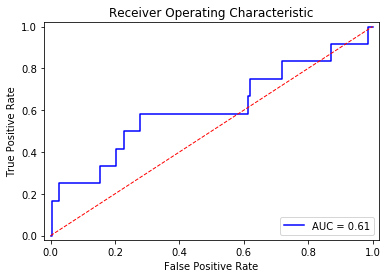

              precision    recall  f1-score   support

        -1.0       0.96      1.00      0.98       223
         1.0       0.67      0.17      0.27        12

    accuracy                           0.95       235
   macro avg       0.81      0.58      0.62       235
weighted avg       0.94      0.95      0.94       235



In [51]:
# Get metrics
metrics(estimator_filter,X_train_filter,y_train,X_tune_filter,y_tune)

## Wrapper Method using Recursive Feature Elimination

In [52]:
# Logistic Regression using RFE
model =LogisticRegression(random_state=SEED)
rfe = RFE(model,n_features_to_select =20) # Selects top 20 features
fit= rfe.fit(X_train,y_train)

In [53]:
# Display Ranks and the columns selected to all features
feature_rank = pd.DataFrame({'columns':secom_merged_train.columns,
                            'ranking':fit.ranking_,
                            'selected':fit.support_})
feature_rank

,columns,ranking,selected
0,feature1,49,False
1,feature2,92,False
2,feature3,83,False
3,feature4,153,False
4,feature5,132,False
...,...,...,...
565,feature586,215,False
566,feature587,381,False
567,feature588,376,False
568,feature589,397,False


In [54]:
# Display only selected features using RFE
recursive_feature_names = feature_rank.loc[feature_rank['selected'] == True]
recursive_feature_names

,columns,ranking,selected
14,feature15,1,True
32,feature33,1,True
33,feature34,1,True
59,feature60,1,True
63,feature64,1,True
64,feature65,1,True
65,feature66,1,True
113,feature118,1,True
125,feature130,1,True
136,feature141,1,True


In [55]:
# Get feature index values
feature_idx = recursive_feature_names['columns'].index
feature_idx

Int64Index([ 14,  32,  33,  59,  63,  64,  65, 113, 125, 136, 174, 177, 191,
            198, 321, 412, 453, 500, 537, 557],
           dtype='int64')

In [56]:
# retain columns based on feature selection
X_train_wrapper = X_train[:, feature_idx]
X_tune_wrapper = X_tune[:, feature_idx]
X_test_wrapper = X_test[:, feature_idx]

In [57]:
# double check dimensions
print(X_train.shape)
print(X_train_wrapper.shape)

(1096, 570)
(1096, 20)


In [58]:
# fit a linear regression model on selected features
estimator_wrapper = LogisticRegression(random_state=SEED)
estimator_wrapper.fit(X_train_wrapper, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2005, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# Predict y- tune values
y_tune_pred = estimator_wrapper.predict(X_tune_wrapper)
accuracyScoreTune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred) # Get accuracy score
print('Accuracy of Tune Set : ' + str(accuracyScoreTune))

Accuracy of Tune Set : 0.9361702127659575


Confusion Matrix
[[220   3]
 [ 12   0]]
Accuracy of Test Set : 0.9361702127659575
Accuracy of Train Set : 0.9370437956204379


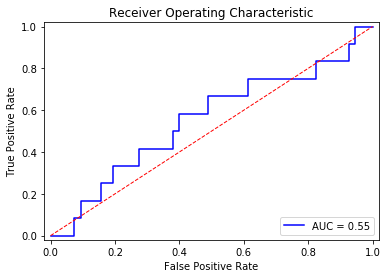

              precision    recall  f1-score   support

        -1.0       0.95      0.99      0.97       223
         1.0       0.00      0.00      0.00        12

    accuracy                           0.94       235
   macro avg       0.47      0.49      0.48       235
weighted avg       0.90      0.94      0.92       235



In [60]:
# Get Metrics
metrics(estimator_wrapper,X_train_wrapper,y_train,X_tune_wrapper,y_tune)

## Embedded Method

### Lasso Regression

In [61]:
# Lasso for Regression tasks, and Logistic Regression for Classification tasks.

# using logistic regression with penalty l1.
logistic_lasso = LogisticRegression(C=1, penalty='l1',solver='liblinear')
logistic_lasso.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# predict probability on tune set
y_tune_prob = logistic_lasso.predict_proba(X_tune)[:,1]

# predict target on tune set
y_tune_pred = logistic_lasso.predict(X_tune)

# Get Accuracy score
accuracyScoreTune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScoreTune))

Accuracy of Tune Set : 0.8893617021276595


In [64]:
print(logistic_lasso.coef_)

[[-4.86991246e-03 -4.14608523e-03 -4.63006544e-03 -3.83550601e-04
  -1.21576353e+00  2.39069894e-02 -1.36780020e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.34662687e-02  0.00000000e+00 -6.49297738e-01  6.71617776e-02
   5.76984165e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.19798702e-03 -1.51258463e-03  3.51679510e-04
  -1.49797920e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.54643542e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.49656242e-01  7.30129687e-02  0.00000000e+00 -2.97264288e-01
   1.69155948e-01  0.00000000e+00 -1.31381898e-01  0.00000000e+00
  -1.82983663e-02 -2.52891234e-01  0.00000000e+00 -1.67391446e-02
   0.00000000e+00  7.32256302e-02 -4.94571394e-03  0.00000000e+00
   2.12228076e-02  0.00000000e+00  0.00000000e+00 -1.33388106e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.46548863e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.61499778e-01
  -1.67766

In [62]:
# double check
print(X_train.shape)
print(sum(logistic_lasso.coef_[0]>0))

(1096, 570)
87


In [66]:
# Sort the coeffecient values
coef = pd.Series(logistic_lasso.coef_[0],feature_names).sort_values()
print(coef)

feature178   -1.984327
feature5     -1.215764
feature572   -0.822643
feature123   -0.808246
feature340   -0.701939
                ...   
feature547    0.638675
feature130    0.672277
feature287    0.818649
feature334    0.993968
feature407    1.167521
Length: 570, dtype: float64


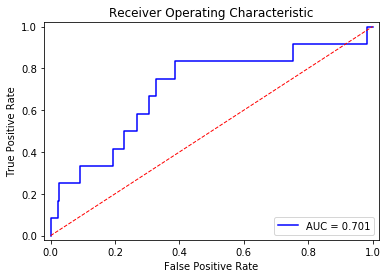

In [64]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [65]:
# comprehensive classification report
print(classification_report(y_true=y_tune, y_pred=y_tune_pred)) 

              precision    recall  f1-score   support

        -1.0       0.96      0.92      0.94       223
         1.0       0.14      0.25      0.18        12

    accuracy                           0.89       235
   macro avg       0.55      0.58      0.56       235
weighted avg       0.92      0.89      0.90       235



## Ridge Regression

In [66]:
# Ridge for Regression tasks, and Logistic Regression for Classification tasks.

# using logistic regression with penalty l2.
logistic_ridge = LogisticRegression(C=1, penalty='l2',solver='liblinear')
logistic_ridge.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# predict probability on tune set
y_tune_prob = logistic_ridge.predict_proba(X_tune)[:,1]

# predict target on tune set
y_tune_pred = logistic_ridge.predict(X_tune)

#Get Accuracy score
accuracyScoreTune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScoreTune))

Accuracy of Tune Set : 0.9148936170212766


In [68]:
# double check
print(X_train.shape)
print(sum(logistic_ridge.coef_[0]>0))

(1096, 570)
227


In [69]:
# Sort the coeffecient values
coef = pd.Series(logistic_ridge.coef_[0],feature_names).sort_values()
print(coef)

feature521   -0.120773
feature15    -0.120484
feature578   -0.100173
feature118   -0.096001
feature429   -0.085412
                ...   
feature60     0.100620
feature33     0.109064
feature130    0.135196
feature198    0.142378
feature389    0.150157
Length: 570, dtype: float64


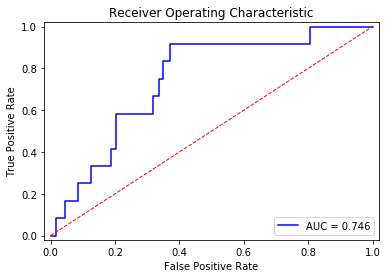

In [70]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [71]:
# comprehensive classification report
print(classification_report(y_true=y_tune, y_pred=y_tune_pred))

              precision    recall  f1-score   support

        -1.0       0.96      0.96      0.96       223
         1.0       0.17      0.17      0.17        12

    accuracy                           0.91       235
   macro avg       0.56      0.56      0.56       235
weighted avg       0.91      0.91      0.91       235



## ElasticNet

In [72]:
# Elasticnet for Regression tasks, and Logistic Regression for Classification tasks.

# using logistic regression with penalty elasticnet.
logistic_elasticnet = LogisticRegression(l1_ratio=0.5,penalty='elasticnet',solver='saga')
logistic_elasticnet.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# predict probability on tune set
y_tune_prob = logistic_elasticnet.predict_proba(X_tune)[:,1]

# predict target on tune set
y_tune_pred = logistic_elasticnet.predict(X_tune)

# Get Accuracy score
accuracyScoreTune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScoreTune))

Accuracy of Tune Set : 0.948936170212766


In [74]:
# double check
print(X_train.shape)
print(sum(logistic_elasticnet.coef_[0]>0))

(1096, 570)
200


In [75]:
# Sort the coeffecient values
coef = pd.Series(logistic_elasticnet.coef_[0],feature_names).sort_values()
print(coef)

feature489   -0.000344
feature91    -0.000256
feature469   -0.000251
feature500   -0.000210
feature419   -0.000166
                ...   
feature22     0.000147
feature161    0.000184
feature434    0.000215
feature512    0.000250
feature226    0.000300
Length: 570, dtype: float64


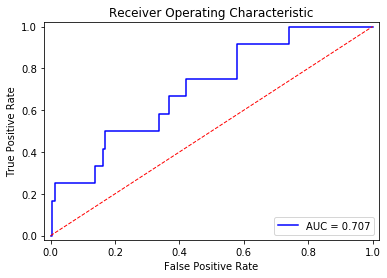

In [76]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [77]:
# comprehensive classification report
print(classification_report(y_true=y_tune, y_pred=y_tune_pred))

              precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       223
         1.0       0.00      0.00      0.00        12

    accuracy                           0.95       235
   macro avg       0.47      0.50      0.49       235
weighted avg       0.90      0.95      0.92       235



## Results From Feature Selection
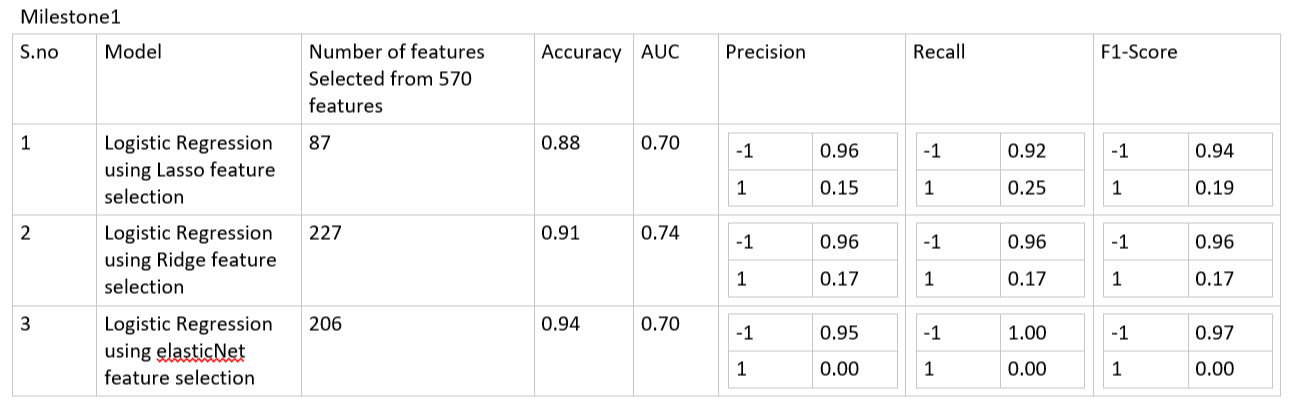
#### From the above three embedded methods for feature selection, best model performance on the tune set is achieved via Lasso regression model by using precision, recall and F1-score values.

## Hyper Parameter Tuning For Logistic Regression using GridSearch CV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
#Instantiate logistic regression model
logModel = LogisticRegression()

In [80]:
# Parameters for GridSearchCV
param_grid = [
    {'penalty' :['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','liblinear','sag','saga']}   
    
]

In [81]:
# Build a GridSearchCV model
clf = GridSearchCV(logModel,param_grid=param_grid,scoring="roc_auc",cv=3,verbose=True,n_jobs=-1)

In [82]:
#Fit the model
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  6.2min finished


In [83]:
# Get GridSearchCV estimator
estimator_best = best_clf.best_estimator_
estimator_best

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# best cross-validation score. 
print(best_clf.best_score_)

0.6370560443141088


In [85]:
# Print the hyper parameters
print(best_clf.best_params_)

{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}


In [86]:
# predict probability on tune set
y_tune_prob = estimator_best.predict_proba(X_tune)[:,1]

# predict class label on tune set
y_tune_pred = estimator_best.predict(X_tune)

In [87]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[216   7]
 [ 11   1]]


In [88]:
# calculate accuracy 
accuracy_score(y_true=y_tune, y_pred=y_tune_pred)

0.9234042553191489

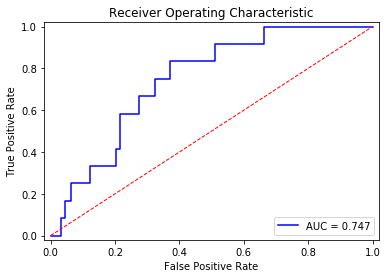

In [89]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [90]:
# comprehensive classification report
print(classification_report(y_true=y_tune, y_pred=y_tune_pred)) 

              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96       223
         1.0       0.12      0.08      0.10        12

    accuracy                           0.92       235
   macro avg       0.54      0.53      0.53       235
weighted avg       0.91      0.92      0.92       235



### Best hyper parameters selected from GridSearchCV - 'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'

## Model Performance in Test Set from the best selected model

In [91]:
# predict probability on test set
y_test_prob = estimator_best.predict_proba(X_test)[:,1]

# predict class label on test set
y_test_pred = estimator_best.predict(X_test)

In [92]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[207  10]
 [ 18   1]]


In [93]:
# calculate accuracy 
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.8813559322033898

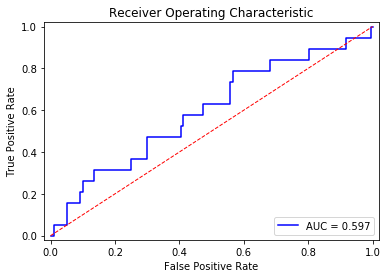

In [94]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [95]:
# comprehensive classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

              precision    recall  f1-score   support

        -1.0       0.92      0.95      0.94       217
         1.0       0.09      0.05      0.07        19

    accuracy                           0.88       236
   macro avg       0.51      0.50      0.50       236
weighted avg       0.85      0.88      0.87       236



### Applying the best model obtained from GridSearchCV to predict values for Test set to get better results. 
